<a href="https://colab.research.google.com/github/aviaga/FutureMakers/blob/main/Day%208%20(7-13)%20-%20Project%20on%20Creating%20a%20Sarcasm%20Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Intro
This is the implementation of Day 8's Action Item for SureStart's Summer Program, 2021.

The purpose of the program is to identify if a given statement/phrase is sarcastic or not.

The dataset for this model building activity can be found [here](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection). 


*This project was completed earlier on 7/13, however, it was hard to follow and incomplete. The code below is adapted from one of SureStart's Live Coding Sessions.*

In [3]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
import matplotlib.pyplot as plt

In [4]:
#Importing dataset 
from google.colab import files
uploaded = files.upload()

Saving Sarcasm_Headlines_Dataset.json to Sarcasm_Headlines_Dataset.json


In [5]:
#Importing dataset
import io
df = pd.read_json(io.BytesIO(uploaded['Sarcasm_Headlines_Dataset.json']), lines=True)

In [6]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


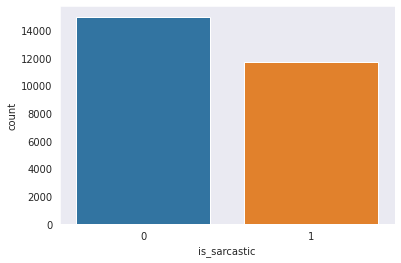

In [10]:
#Plot the class labels distribution / visualizing the data (graph)
sns.set_style("dark")
sns.countplot(df.is_sarcastic)

In [11]:
#Seeing the number of samples in each class (numeric)
df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [12]:
#Seeing the total number of data samples (0s and 1s combined)
len(df.is_sarcastic)

26709

In [15]:
#Define X and Y
X = df.iloc[:,1] #X has Headlines stored
Y = df.iloc[:,2] #Y has is_sarcastic values stored
print(y)

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object


In [16]:
#Split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
len(X_train) #Printing number of data points in the training sample

21367

In [17]:
#Data preprocessing
#Separating each individual word and putting into array
max_words = 1000 #Top 1,000 occurring words in the dataset
max_len = 150 #Maximum number of words in each sentence (all sentences should have 150 words, if default is shorter is padded, otherwise truncated)
tok = Tokenizer(num_words=max_words) 
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len) #Padding with 0s if sentence has less than 150 words
sequences_matrix.shape

(21367, 150)

In [20]:
sequences_matrix

array([[  0,   0,   0, ..., 967,   4, 792],
       [  0,   0,   0, ...,  45, 258, 691],
       [  0,   0,   0, ...,   0,   0,   2],
       ...,
       [  0,   0,   0, ...,   1, 119,  48],
       [  0,   0,   0, ...,   4, 574, 341],
       [  0,   0,   0, ..., 669,  43, 112]], dtype=int32)

In [21]:
np.amax(sequences_matrix) #Gives maximum number present in 2D matrix (highest value in range of most common values in dataset)

999

In [22]:
#Define the RNN model
def RNN():
  inputs = Input(name='inputs', shape=[max_len])
  layer = Embedding(max_words, 50, input_length=max_len)(inputs) #Embedding layer. Converts numbers into vector representation of length 50. The input length is 1,000 (max length)
  layer = LSTM(64)(layer) #LSTM Layer (type of RNN)
  layer = Dense(256, name='FC1')(layer) #Fully Connected Layer
  layer = Activation('relu')(layer) #ReLU Activation function
  layer = Dropout(0.2)(layer) #Optimizer Layer
  layer = Dense(1, name='out_layer')(layer) #Another Fully Connected Layer (Output)
  layer = Activation('sigmoid')(layer) #Sigmoid Activation function (Output)
  model = Model(inputs=inputs, outputs=layer)
  
  return model

In [25]:
#Compile the model
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

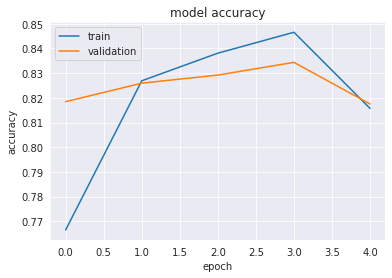

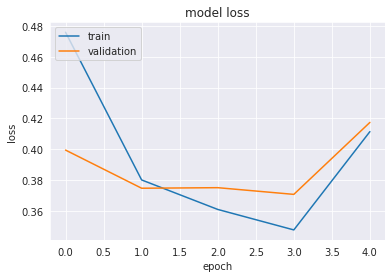

In [30]:
#Show model accuracy and loss on a graph
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.grid()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
#Fit the model
history = model.fit(sequences_matrix, Y_train, batch_size=100, epochs=5, validation_split=0.1)

Epoch 1/5
193/193 [==============================] - 18s 20ms/step - loss: 0.5555 - accuracy: 0.6937 - val_loss: 0.3994 - val_accuracy: 0.8184
Epoch 2/5
193/193 [==============================] - 3s 15ms/step - loss: 0.3778 - accuracy: 0.8318 - val_loss: 0.3746 - val_accuracy: 0.8259
Epoch 3/5
193/193 [==============================] - 3s 14ms/step - loss: 0.3522 - accuracy: 0.8407 - val_loss: 0.3750 - val_accuracy: 0.8292
Epoch 4/5
193/193 [==============================] - 3s 15ms/step - loss: 0.3407 - accuracy: 0.8499 - val_loss: 0.3706 - val_accuracy: 0.8343
Epoch 5/5
193/193 [==============================] - 3s 15ms/step - loss: 0.3771 - accuracy: 0.8315 - val_loss: 0.4174 - val_accuracy: 0.8175


In [27]:
#Evaluate on test set
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)
test_sequences_matrix.shape

(5342, 150)

In [29]:
#Print test results
accr = model.evaluate(test_sequences_matrix, Y_test)
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(accr[0], accr[1]))

167/167 [==============================] - 1s 7ms/step - loss: 0.4170 - accuracy: 0.8147
Test set
 Loss: 0.417
 Accuracy: 0.815
